<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
from __future__ import print_function

%matplotlib inline

import numpy
import matplotlib.pyplot as plt

# Review:  Finite Differences

Finite differences are expressions that approximate derivatives of a function evaluated at a set of points, often called a *stencil*.  These expressions can come in many different flavors including types of stencils, order of accuracy, and order of derivatives.  In this lecture we will review the process of derivation, error analysis and application of finite differences.

## Derivation of Finite Differences

The general approach to deriving finite differences should be familiar for at least the first order differences.  Consider three different ways to define a derivative at a point $x_i$
$$
    u'(x_i) = \lim_{\Delta x \rightarrow 0} \left \{ \begin{aligned} 
        &\frac{u(x_i + \Delta x) - u(x_i)}{\Delta x} & \equiv D_+ u(x_i)\\
        &\frac{u(x_i + \Delta x) - u(x_i - \Delta_x)}{2 \Delta x} & \equiv D_0 u(x_i)\\
        &\frac{u(x_i) - u(x_i - \Delta_x)}{\Delta x} & \equiv D_- u(x_i).
    \end{aligned} \right .
$$

![Approximations to $u'(x)$](./images/fd_basic.png)

If instead of allowing $\Delta x \rightarrow 0$ we come up with an approximation to the slope $u'(x_i)$ and hence our definitions of derivatives can directly be seen as approximations to derivatives when $\Delta x$ is perhaps small but non-zero.

For the rest of the review we will delve into a more systematic way to derive these approximations as well as find higher order accurate approximations, higher order derivative approximations, and understand the error associated with the approximations.

### Interpolating Polynomials

One way to derive finite difference approximations is by finding an interpolating polynomial through the given stencil and differentiating that directly.  Given $N+1$ points $(x_0,u(x_0)), (x_1,u(x_1)), \ldots, (x_{N},u(x_{N}))$ assuming the $x_i$ are all unique, the interpolating polynomial $P_N(x)$ can be written as

$$
    P_N(x) = \sum^{N}_{i=0} u(x_i) \ell_i(x)
$$

where 

$$
    \ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}
$$

Note that $\ell_i(x_i) = 1$ and $\forall j\neq i, ~~ \ell_i(x_j) = 0$.  

Since we know how to differentiate a polynomial we should be able to then compute the given finite difference approximation given these data points.

#### Example: 2-Point Stencil

Say we have two points to form the approximation to the derivative with.  The interpolating polynomial through two points is a linear function with the form
$$
    P_1(x) = u(x_0) \frac{x - x_1}{x_0 - x_1} + u(x_1) \frac{x - x_0}{x_1 - x_0}.
$$
Derive the approximation centered at $x_0$ from this polynomial.

Differentiating $P_1(x)$ leads to
$$
    P'_1(x) = u(x_0) \frac{1}{x_0 - x_1} + u(x_1) \frac{1}{x_1 - x_0}.
$$

If we allow the spacing between $x_0$ and $x_1$ to be $\Delta x = x_1 - x_0$ we can then write this as
$$
    P'_1(x) = \frac{u(x_1) - u(x_0)}{\Delta x}
$$
which is the general form of $D_-u(x)$ and $D_+u(x)$ above.

If we extend this to have three points we have the interpolating polynomial
$$
    P_2(x) = u(x_0) \frac{x - x_1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2} + u(x_1) \frac{x - x_0}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2} + u(x_2) \frac{x - x_0}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1}.
$$

Differentiating this leads to
$$\begin{aligned}
    P'_2(x) &= u(x_0) \left( \frac{1}{x_0 - x_1} \frac{x - x_2}{x_0 - x_2} + \frac{x - x_1}{x_0 - x_1} \frac{1}{x_0 - x_2}\right )+ u(x_1) \left ( \frac{1}{x_1 - x_0} \frac{x - x_2}{x_1 - x_2} + \frac{x - x_0}{x_1 - x_0} \frac{1}{x_1 - x_2} \right )+ u(x_2)\left ( \frac{1}{x_2 - x_0} \frac{x - x_1}{x_2 - x_1} + \frac{x - x_0}{x_2 - x_0} \frac{1}{x_2 - x_1} \right ) \\
    &= u(x_0) \left(\frac{x - x_2}{2 \Delta x^2} + \frac{x - x_1}{2 \Delta x^2} \right )+ u(x_1) \left ( \frac{x - x_2}{-\Delta x^2} + \frac{x - x_0}{-\Delta x^2} \right )+ u(x_2)\left ( \frac{x - x_1}{2\Delta x^2} + \frac{x - x_0}{2 \Delta x^2} \right ) \\
    &=\frac{u(x_0)}{2\Delta x^2} (2x - x_2 - x_1)+ \frac{u(x_1)}{-\Delta x^2} ( 2x - x_2 - x_0)+ \frac{u(x_2)}{2\Delta x^2}( 2x - x_1 - x_0) \\
    &=\frac{u(x_0)}{2\Delta x^2} (2x - x_2 - x_1)+ \frac{u(x_1)}{-\Delta x^2} ( 2x - x_2 - x_0)+ \frac{u(x_2)}{2\Delta x^2}( 2x - x_1 - x_0).
\end{aligned}$$

If we now evaluate the derivative at $x_1$, assuming this is the central point, we have
$$\begin{aligned}
    P'_2(x_1) &= \frac{u(x_0)}{2\Delta x^2} (x_1 - x_2)+ \frac{u(x_1)}{-\Delta x^2} ( x_1 - x_2 + x_1 - x_0)+ \frac{u(x_2)}{\Delta x^2}( x_1 - x_0) \\
    &= \frac{u(x_0)}{2\Delta x^2} (-\Delta x)+ \frac{u(x_1)}{-\Delta x^2} ( -\Delta x + \Delta x)+ \frac{u(x_2)}{\Delta x^2}( 2\Delta x) \\
    &= \frac{u(x_2) - u(x_0)}{2 \Delta x}
\end{aligned}$$
giving us the third approximation from above.

### Taylor-Series Methods

Another way to derive finite difference approximations can be computed by using the Taylor series and the method of undetermined coefficients.

$$u(x) = u(x_n) + (x - x_n) u'(x_n) + \frac{(x - x_n)^2}{2!} u''(x_n) + \frac{(x - x_n)^3}{3!} u'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Say we want to derive the second order accurate, first derivative approximation that just did, this requires the values $(x_{n+1}, u(x_{n+1}))$ and $(x_{n-1}, u(x_{n-1}))$.  We can express these values via our Taylor series approximation above as

$$\begin{aligned}
    u(x_{n+1}) &= u(x_n) + (x_{n+1} - x_n) u'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} u''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} u'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
    &= u(x_n) + \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) + \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) 
\end{aligned}$$

and 

$$\begin{aligned}
    u(x_{n-1}) &= u(x_n) + (x_{n-1} - x_n) u'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} u''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} u'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) \\
&= u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) 
\end{aligned}$$

Now to find out how to combine these into an expression for the derivative we assume our approximation looks like

$$u'(x_n) + R(x_n) = A u(x_{n+1}) + B u(x_n) + C u(x_{n-1})$$

where $R(x_n)$ is our error.  

Plugging in the Taylor series approximations we find

$$u'(x_n) + R(x_n) = A \left ( u(x_n) + \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) + \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4)\right ) + B u(x_n) + C \left ( u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) \right )$$

Since we want $R(x_n) = \mathcal{O}(\Delta x^2)$ we want all terms lower than this to disappear except for those multiplying $u'(x_n)$ as those should sum to 1 to give us our approximation.  Collecting the terms with common derivatives $u^{(k)}(x_n)$ together we get a series of expressions for the coefficients $A$, $B$, and $C$ based on the fact we want an approximation to $u'(x_n)$.  The $n=0$ terms collected are $A + B + C$ and are set to 0 as we want the $u(x_n)$ term to disappear

$$\begin{aligned}
    u(x_n): & \quad A + B + C = 0 \\
    u'(x_n): & \quad A \Delta x - C \Delta x = 1  \\
    u''(x_n): & \quad A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} = 0 
\end{aligned}$$

This last equation $\Rightarrow A = -C$, using this in the second equation gives $A = \frac{1}{2 \Delta x}$ and $C = -\frac{1}{2 \Delta x}$.  The first equation then leads to $B = 0$.  Putting this altogether then gives us our previous expression including an estimate for the error:

$$u'(x_n) + R(x_n) = \frac{u(x_{n+1}) - u(x_{n-1})}{2 \Delta x} + \frac{1}{2 \Delta x} \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) + \frac{1}{2 \Delta x} \frac{\Delta x^3}{3!} u'''(x_n) + \mathcal{O}(\Delta x^4) $$

$$R(x_n) = \frac{\Delta x^2}{3!} u'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)$$

### Example: First Order Derivatives

0.6613879270715355 = 0.6613879270715354


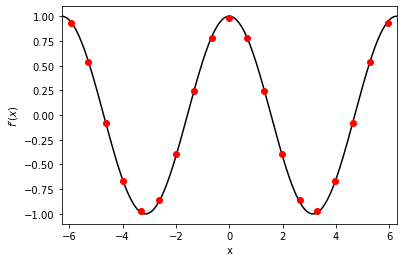

In [3]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]
print("%s = %s" % (delta_x, (x_hat[-1] - x_hat[0]) / (N - 1)))

# Compute forward difference using a loop
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[i]) - f(x_hat[i-1])) / delta_x

# Vector based calculation
# f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.set_xlabel("x")
axes.set_ylabel(r"$f'(x)$")

plt.show()

### Example: Second Order Derivative

Using our Taylor series approach lets derive the second order accurate second derivative formula.  Again we will use the same points and the Taylor series centered at $x = x_n$ so we end up with the same expression as before:

$$\begin{aligned}
    u''(x_n) + R(x_n) &= \quad A \left ( u(x_n) + \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) + \frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &\quad+ B u(x_n) \\
    &\quad+ C \left ( u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$

except this time we want to leave $u''(x_n)$ on the right hand side.  Doing the same trick as before we have the following expressions:

$$\begin{aligned}
    u(x_n): & \quad A + B + C = 0 \\
    u'(x_n): & \quad A \Delta x - C \Delta x = 0 \\
    u''(x_n): & \quad A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} = 1
\end{aligned}$$

The second equation implies $A = C$ which combined with the third implies

$$A = C = \frac{1}{\Delta x^2}$$

Finally the first equation gives

$$B = -\frac{2}{\Delta x^2}$$

leading to the final expression

$$\begin{aligned}
    u''(x_n) + R(x_n) &= \frac{u(x_{n+1}) - 2 u(x_n) + u(x_{n-1})}{\Delta x^2} \\
&\quad+ \frac{1}{\Delta x^2} \left(\frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n)  - \frac{\Delta x^3}{3!} u'''(x_n) + \frac{\Delta x^4}{4!} u^{(4)}(x_n)  \right) + \mathcal{O}(\Delta x^5)
\end{aligned}$$

with

$$R(x_n) = \frac{\Delta x^2}{12} u^{(4)}(x_n) + \mathcal{O}(\Delta x^3)$$

In [ ]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 10
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()

### General Derivation

For a general finite difference approximation located at $\bar{x}$ to the $k$th derivative with the arbitrary stencil $N \geq k + 1$ points $x_1, \ldots, x_N$ we can use some generalizations of the above method.  Note that although it is common that $\bar{x}$ is one of the stencil points this is not necessary.  We also assume that $u(x)$ is sufficiently smooth so that our Taylor series are valid.

At each stencil point we have the approximation
$$
    u(x_i) = u(\bar{x}) + (x_i - \bar{x})u'(\bar{x}) + \cdots + \frac{1}{k!}(x_i - \bar{x})^k u^{(k)}(\bar{x}) + \cdots.
$$

Following our methodology above we want to find the linear combination of these Taylor series expansions such that
$$
    u^{(k)}(\bar{x}) + \mathcal{O}(\Delta x^p) = a_1 u(x_1) + a_2 u(x_2) + a_3 u(x_3) + \cdots + a_n u(x_n).
$$
Note that $\Delta x$ can vary in general and the asymptotic behavior of the method will be characterized by some sort of average distance or sometimes the maximum distance between the stencil points.

Generalizing the approach above with the method of undetermined coefficients we want to eliminate the pieces of the above approximation that are in front of the derivatives less than order $k$.  The condition for this is
$$
    \frac{1}{(i - 1)!} \sum^N_{j=1} a_j (x_j - \bar{x})^{(i-1)} = \left \{ \begin{aligned}
        1 & & \text{if} \quad i - 1 = k, \\
        0 & & \text{otherwise}
    \end{aligned} \right .
$$
for $i=1, \ldots, N$.  Assuming the $x_j$ are distinct we can write the system of equations in a Vandermonde system which will have a unique solution.

In [ ]:
import scipy.special

def finite_difference(k, x_bar, x):
    """Compute the finite difference stencil for the kth derivative"""
    
    N = x.shape[0]
    A = numpy.ones((N, N))
    x_row = x - x_bar
    for i in range(1, N):
        A[i, :] = x_row ** i / scipy.special.factorial(i)
    b = numpy.zeros(N)
    b[k] = 1.0
    c = numpy.linalg.solve(A, b)
    return c

print(finite_difference(2, 0.0, numpy.asarray([-1.0, 0.0, 1.0])))
print(finite_difference(1, 0.0, numpy.asarray([-1.0, 0.0, 1.0])))
print(finite_difference(1, -2.0, numpy.asarray([-2.0, -1.0, 0.0, 1.0, 2.0])))
print(finite_difference(2, 0.0, numpy.asarray([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])) * 12)

## Error Analysis

### Polynomial View

Given $N + 1$ points we can form an interpolant $P_N(x)$ of degree $N$ where

$$u(x) = P_N(x) + R_N(x)$$

We know from Lagrange's Theorem that the remainder term looks like

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{u^{(N+1)}(c)}{(N+1)!}$$

noting that we need to require that $u(x) \in C^{N+1}$ on the interval of interest.  Taking the derivative of the interpolant $P_N(x)$ (in terms of Newton polynomials) then leads to 

$$\begin{aligned}
    P_N'(x) &= [u(x_0), u(x_1)] + ((x - x_1) + (x - x_0)) [u(x_0), u(x_1), u(x_2)]+ \cdots \\
    &\quad  + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [u(x_0), u(x_1), \ldots, u(x_N)]
\end{aligned}$$

Similarly we can find the derivative of the remainder term $R_N(x)$ as

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{u^{(N+1)}(c)}{(N+1)!}$$

Now if we consider the approximation of the derivative evaluated at one of our data points $(x_k, y_k)$ these expressions simplify such that

$$u'(x_k) = P_N'(x_k) + R_N'(x_k)$$

If we let $\Delta x = \max_i |x_k - x_i|$ we then know that the remainder term will be $\mathcal{O}(\Delta x^N)$ as $\Delta x \rightarrow 0$ thus showing that this approach converges and we can find arbitrarily high order approximations.

### Truncation Error

If we are using a Taylor series approach we can also look at the dominate term left over from in the Taylor series to find the *truncation error*.

As an example lets again consider the first derivative approximations above, we need the Taylor expansions
$$
    u(\bar{x} + \Delta x) = u(\bar{x}) + \Delta x u'(\bar{x}) + \frac{1}{2} \Delta x^2 u''(\bar{x}) + \frac{1}{3!} \Delta x^3 u'''(\bar{x}) + \mathcal{O}(\Delta x^4)
$$
and
$$
    u(\bar{x} - \Delta x) = u(\bar{x}) - \Delta x u'(\bar{x}) + \frac{1}{2} \Delta x^2 u''(\bar{x}) - \frac{1}{3!} \Delta x^3 u'''(\bar{x}) + \mathcal{O}(\Delta x^4).
$$

Plugging these into our expressions we have
$$\begin{aligned}
    D_+ u(\bar{x}) &= \frac{u(\bar{x} + \Delta x) - u(\bar{x})}{\Delta x} \\
    &= \frac{\Delta x u'(\bar{x}) + \frac{1}{2} \Delta x^2 u''(\bar{x}) + \frac{1}{3!} \Delta x^3 u'''(\bar{x}) + \mathcal{O}(\Delta x^4)}{\Delta x} \\
    &= u'(\bar{x}) + \frac{1}{2} \Delta x u''(\bar{x}) + \frac{1}{3!} \Delta x^2 u'''(\bar{x}) + \mathcal{O}(\Delta x^3).
\end{aligned}$$

If we now difference $D_+ u(\bar{x}) - u'(\bar{x})$ we get the truncation error
$$
    \frac{1}{2} \Delta x u''(\bar{x}) + \frac{1}{3!} \Delta x^2 u'''(\bar{x}) + \mathcal{O}(\Delta x^3)
$$
so the error for $D_+$ goes as $\mathcal{O}(\Delta x)$ and is controlled by $u''(\bar{x})$.  Note that this approximation is dependent on $\Delta x$ as the derivatives evaluated at $\bar{x}$ are constants.

Similarly for the centered approximation we have
$$
    D_0 u(\bar{x}) - u'(\bar{x}) = \frac{1}{6} \Delta x^2 u'''(\bar{x}) + \mathcal{O}(\Delta x^4).
$$

### Computing Order of Accuracy Graphically

Model the error as
$$\begin{aligned}
    e(\Delta x) &= C \Delta x^n \\
    \log e(\Delta x) &= \log C + n \log \Delta x
\end{aligned}$$

Slope of line is $n$ when computing this!  We can also match the first point by solving for $C$:

$$C = e^{\log e(\Delta x) - n \log \Delta x}$$

In [ ]:
f = lambda x: numpy.sin(x) + x**2 + 3.0 * x**3
f_prime = lambda x: numpy.cos(x) + 2.0 * x + 9.0 * x**2

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute forward difference
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[-1])

    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]  # Backward Difference at x_N
    
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat + delta_x[-1]) - f_prime_hat), ord=numpy.infty))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


plt.show()

In [ ]:
f = lambda x: numpy.sin(x) + x**2 + 3.0 * x**3
f_prime = lambda x: numpy.cos(x) + 2.0 * x + 9.0 * x**2

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N + 1)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])

    # Use first-order differences for points at edge of domain
#     f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]  
#     f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    # Use second-order differences for points at edge of domain
    f_prime_hat[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  + - f(x_hat[2]))  / (2.0 * delta_x[-1])
    f_prime_hat[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * delta_x[-1])
    
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.infty))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, "ro", label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

In [ ]:
f = lambda x: numpy.sin(x) + x**2 + 3.0 * x**3
f_dubl_prime = lambda x: -numpy.sin(x) + 2.0 + 18.0 * x

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_dubl_prime_hat = numpy.empty(x_hat.shape)
    f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x[-1]**2)

    # Use second-order differences for points at edge of domain
    f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x[-1]**2
    f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x[-1]**2
    
    error.append(numpy.linalg.norm(numpy.abs(f_dubl_prime(x_hat) - f_dubl_prime_hat), ord=numpy.infty))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error, "ko", label="Approx. Derivative")
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[2], error[2], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[2], error[2], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)

plt.show()